<a href="https://colab.research.google.com/github/larissa-prisca/Analyse-des-ventes-mondiales-de-jeux-vid-o-1980-2020---Projet-Data-STIC/blob/main/analyse_jeux_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier uploadé
df = pd.read_csv('vgsales.csv')

print("✅ Données chargées avec succès!")
print(f"📊 Nombre de lignes : {len(df)}")
print(f"📋 Colonnes : {list(df.columns)}")

# Afficher les premières lignes
df.head()

✅ Données chargées avec succès!
📊 Nombre de lignes : 16598
📋 Colonnes : ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration pour de beaux graphiques
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Bibliothèques importées!")

✅ Bibliothèques importées!


In [ ]:
# Afficher les 10 premières lignes
print("🎮 APERÇU DES DONNÉES")
print("="*80)
df.head(10)

🎮 APERÇU DES DONNÉES


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
# Informations sur le dataset
print("📊 INFORMATIONS GÉNÉRALES")
print("="*80)
print(f"✅ Nombre total de jeux : {df.shape[0]}")
print(f"✅ Nombre de colonnes : {df.shape[1]}")
print(f"\n📋 Liste des colonnes :")
for col in df.columns:
    print(f"   - {col}")

📊 INFORMATIONS GÉNÉRALES
✅ Nombre total de jeux : 16598
✅ Nombre de colonnes : 11

📋 Liste des colonnes :
   - Rank
   - Name
   - Platform
   - Year
   - Genre
   - Publisher
   - NA_Sales
   - EU_Sales
   - JP_Sales
   - Other_Sales
   - Global_Sales


In [ ]:
# Vérifier les valeurs manquantes
print("❌ VALEURS MANQUANTES PAR COLONNE")
print("="*80)
missing = df.isnull().sum()
for col, count in missing.items():
    if count > 0:
        print(f"⚠️  {col} : {count} valeurs manquantes ({count/len(df)*100:.1f}%)")
    else:
        print(f"✅ {col} : 0 valeur manquante")

❌ VALEURS MANQUANTES PAR COLONNE
✅ Rank : 0 valeur manquante
✅ Name : 0 valeur manquante
✅ Platform : 0 valeur manquante
⚠️  Year : 271 valeurs manquantes (1.6%)
✅ Genre : 0 valeur manquante
⚠️  Publisher : 58 valeurs manquantes (0.3%)
✅ NA_Sales : 0 valeur manquante
✅ EU_Sales : 0 valeur manquante
✅ JP_Sales : 0 valeur manquante
✅ Other_Sales : 0 valeur manquante
✅ Global_Sales : 0 valeur manquante


In [ ]:
# Nombre de lignes AVANT nettoyage
print(f"📊 AVANT nettoyage : {len(df)} jeux")
print("="*80)

# Supprimer les lignes sans année (on peut pas analyser sans savoir quand c'est sorti)
df = df.dropna(subset=['Year'])

# Convertir Year en nombre entier (plus facile à manipuler)
df['Year'] = df['Year'].astype(int)

# Supprimer les jeux qui ont 0 ventes (données incorrectes)
df = df[df['Global_Sales'] > 0]

print(f"\n✅ APRÈS nettoyage : {len(df)} jeux")
print(f"🗑️  Supprimé : {16598 - len(df)} jeux avec données incomplètes")

📊 AVANT nettoyage : 16598 jeux

✅ APRÈS nettoyage : 16327 jeux
🗑️  Supprimé : 271 jeux avec données incomplètes


In [ ]:
# Statistiques sur les ventes
print("💰 STATISTIQUES SUR LES VENTES MONDIALES")
print("="*80)
print(f"📈 Moyenne : {df['Global_Sales'].mean():.2f} millions")
print(f"📊 Médiane : {df['Global_Sales'].median():.2f} millions")
print(f"⬆️  Maximum : {df['Global_Sales'].max():.2f} millions")
print(f"⬇️  Minimum : {df['Global_Sales'].min():.2f} millions")
print(f"📏 Écart-type : {df['Global_Sales'].std():.2f} millions")

print("\n🌍 TOTAL DES VENTES PAR RÉGION")
print("="*80)
print(f"🇺🇸 Amérique du Nord : {df['NA_Sales'].sum():.2f} millions")
print(f"🇪🇺 Europe : {df['EU_Sales'].sum():.2f} millions")
print(f"🇯🇵 Japon : {df['JP_Sales'].sum():.2f} millions")
print(f"🌏 Autres : {df['Other_Sales'].sum():.2f} millions")
print(f"🌎 TOTAL MONDIAL : {df['Global_Sales'].sum():.2f} millions")

💰 STATISTIQUES SUR LES VENTES MONDIALES
📈 Moyenne : 0.54 millions
📊 Médiane : 0.17 millions
⬆️  Maximum : 82.74 millions
⬇️  Minimum : 0.01 millions
📏 Écart-type : 1.57 millions

🌍 TOTAL DES VENTES PAR RÉGION
🇺🇸 Amérique du Nord : 4333.43 millions
🇪🇺 Europe : 2409.12 millions
🇯🇵 Japon : 1284.30 millions
🌏 Autres : 789.01 millions
🌎 TOTAL MONDIAL : 8820.36 millions


In [ ]:
# Top 10 des jeux les plus vendus
top10 = df.nlargest(10, 'Global_Sales')

print("🏆 TOP 10 DES JEUX LES PLUS VENDUS DE TOUS LES TEMPS")
print("="*80)

for idx, (i, row) in enumerate(top10.iterrows(), 1):
    print(f"{idx}. 🎮 {row['Name']}")
    print(f"   📅 Année : {int(row['Year'])}")
    print(f"   🎯 Plateforme : {row['Platform']}")
    print(f"   💰 Ventes : {row['Global_Sales']} millions")
    print(f"   🏢 Éditeur : {row['Publisher']}")
    print("-"*80)

🏆 TOP 10 DES JEUX LES PLUS VENDUS DE TOUS LES TEMPS
1. 🎮 Wii Sports
   📅 Année : 2006
   🎯 Plateforme : Wii
   💰 Ventes : 82.74 millions
   🏢 Éditeur : Nintendo
--------------------------------------------------------------------------------
2. 🎮 Super Mario Bros.
   📅 Année : 1985
   🎯 Plateforme : NES
   💰 Ventes : 40.24 millions
   🏢 Éditeur : Nintendo
--------------------------------------------------------------------------------
3. 🎮 Mario Kart Wii
   📅 Année : 2008
   🎯 Plateforme : Wii
   💰 Ventes : 35.82 millions
   🏢 Éditeur : Nintendo
--------------------------------------------------------------------------------
4. 🎮 Wii Sports Resort
   📅 Année : 2009
   🎯 Plateforme : Wii
   💰 Ventes : 33.0 millions
   🏢 Éditeur : Nintendo
--------------------------------------------------------------------------------
5. 🎮 Pokemon Red/Pokemon Blue
   📅 Année : 1996
   🎯 Plateforme : GB
   💰 Ventes : 31.37 millions
   🏢 Éditeur : Nintendo
-------------------------------------------------

/tmp/ipython-input-3337452620.py:19: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


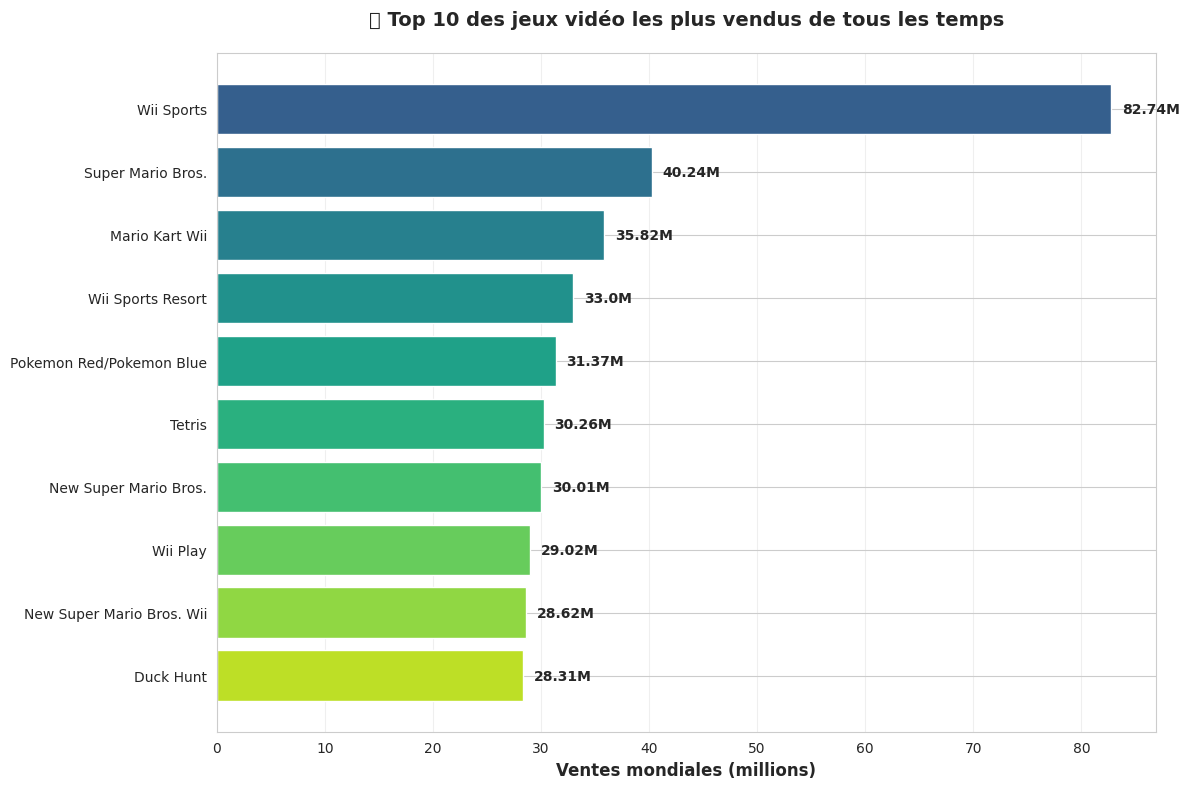

<Figure size 1200x600 with 0 Axes>

In [ ]:
top10 = df.nlargest(10, 'Global_Sales')

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, 10))
bars = plt.barh(range(len(top10)), top10['Global_Sales'], color=colors)

# Personnaliser
plt.yticks(range(len(top10)), top10['Name'])
plt.xlabel('Ventes mondiales (millions)', fontsize=12, fontweight='bold')
plt.title('🏆 Top 10 des jeux vidéo les plus vendus de tous les temps',
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Ajouter les valeurs sur les barres
for i, (bar, value) in enumerate(zip(bars, top10['Global_Sales'])):
    plt.text(value + 1, i, f'{value}M', va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('graphique_top10_jeux.png', dpi=300, bbox_inches='tight')


/tmp/ipython-input-241915119.py:25: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-241915119.py:25: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-241915119.py:25: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-241915119.py:25: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-241915119.py:25: UserWarning: Glyph 127471 (\N{REGIONAL INDICATOR SYMBOL LETTER J}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-241915119.py:25: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-241915119.py:25: UserWarning: Glyph 127759

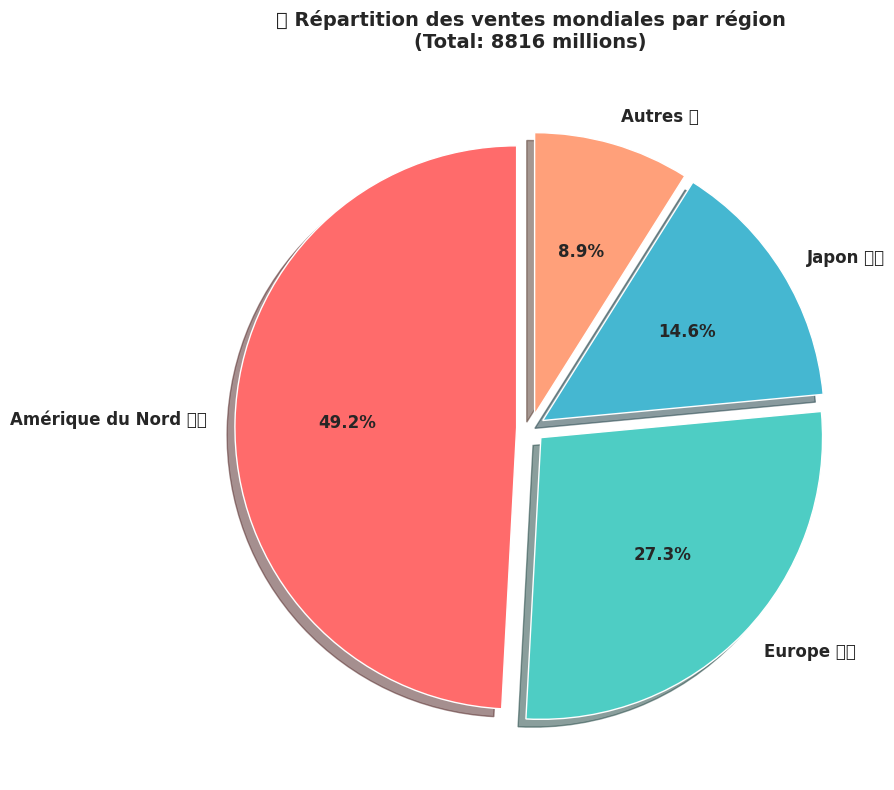

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Calculer les totaux par région
regions_ventes = {
    'Amérique du Nord 🇺🇸': df['NA_Sales'].sum(),
    'Europe 🇪🇺': df['EU_Sales'].sum(),
    'Japon 🇯🇵': df['JP_Sales'].sum(),
    'Autres 🌏': df['Other_Sales'].sum()
}

# Créer le graphique
plt.figure(figsize=(10, 8))
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#ffa07a']
explode = (0.05, 0.05, 0.05, 0.05)  # Séparer légèrement les parts

plt.pie(regions_ventes.values(),
        labels=regions_ventes.keys(),
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        shadow=True,
        startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('🌍 Répartition des ventes mondiales par région\n(Total: {:.0f} millions)'.format(sum(regions_ventes.values())),
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
plt.savefig('graphique_repartition_regions.png', dpi=300, bbox_inches='tight')


/tmp/ipython-input-1146635052.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


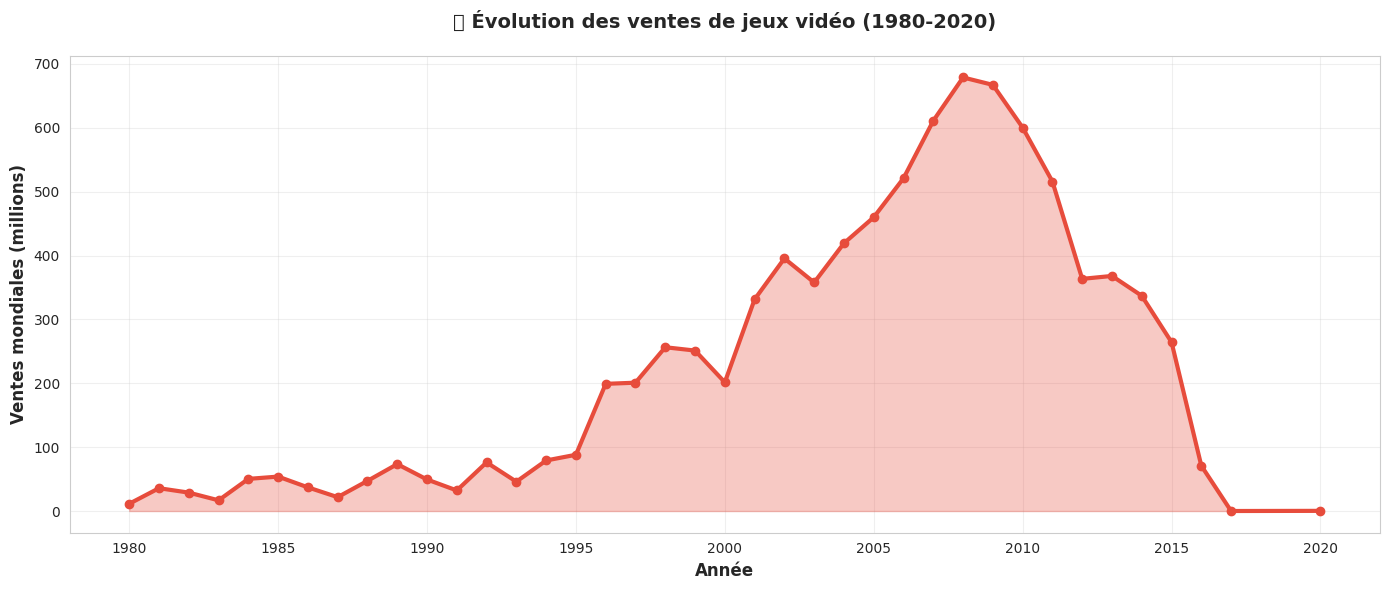

🔥 MEILLEURE ANNÉE : 2008 avec 679 millions de ventes !


<Figure size 1200x600 with 0 Axes>

In [ ]:
# Grouper les ventes par année
ventes_annee = df.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(ventes_annee['Year'], ventes_annee['Global_Sales'],
         marker='o', linewidth=3, markersize=6, color='#e74c3c')

# Remplir sous la courbe
plt.fill_between(ventes_annee['Year'], ventes_annee['Global_Sales'],
                 alpha=0.3, color='#e74c3c')

plt.xlabel('Année', fontsize=12, fontweight='bold')
plt.ylabel('Ventes mondiales (millions)', fontsize=12, fontweight='bold')
plt.title('📈 Évolution des ventes de jeux vidéo (1980-2020)',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('graphique_evolution_ventes.png', dpi=300, bbox_inches='tight')

# Afficher l'année avec le plus de ventes
best_year = ventes_annee.loc[ventes_annee['Global_Sales'].idxmax()]
print(f"🔥 MEILLEURE ANNÉE : {int(best_year['Year'])} avec {best_year['Global_Sales']:.0f} millions de ventes !")

/tmp/ipython-input-3094217713.py:17: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


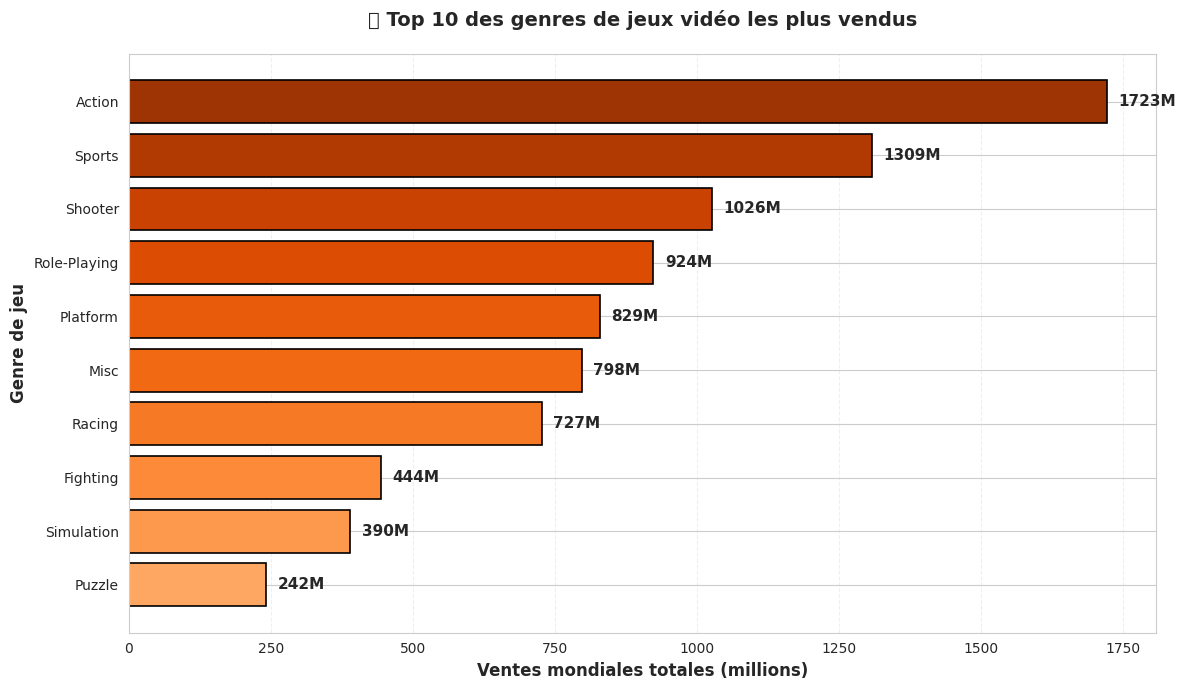


🏆 GENRE LE PLUS POPULAIRE : Action avec 1723 millions de ventes !


<Figure size 1200x600 with 0 Axes>

In [ ]:
# Grouper les ventes par genre et prendre le top 10
top_genres = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=True).tail(10)

plt.figure(figsize=(12, 7))
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, 10))
bars = plt.barh(top_genres.index, top_genres.values, color=colors, edgecolor='black', linewidth=1.2)

# Ajouter les valeurs à côté des barres
for i, (genre, value) in enumerate(top_genres.items()):
    plt.text(value + 20, i, f'{value:.0f}M', va='center', fontweight='bold', fontsize=11)

plt.xlabel('Ventes mondiales totales (millions)', fontsize=12, fontweight='bold')
plt.ylabel('Genre de jeu', fontsize=12, fontweight='bold')
plt.title('🎯 Top 10 des genres de jeux vidéo les plus vendus',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
plt.savefig('graphique_top_genres.png', dpi=300, bbox_inches='tight')

# Afficher le genre dominant
print(f"\n🏆 GENRE LE PLUS POPULAIRE : {top_genres.index[-1]} avec {top_genres.values[-1]:.0f} millions de ventes !")

/tmp/ipython-input-3835074298.py:17: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


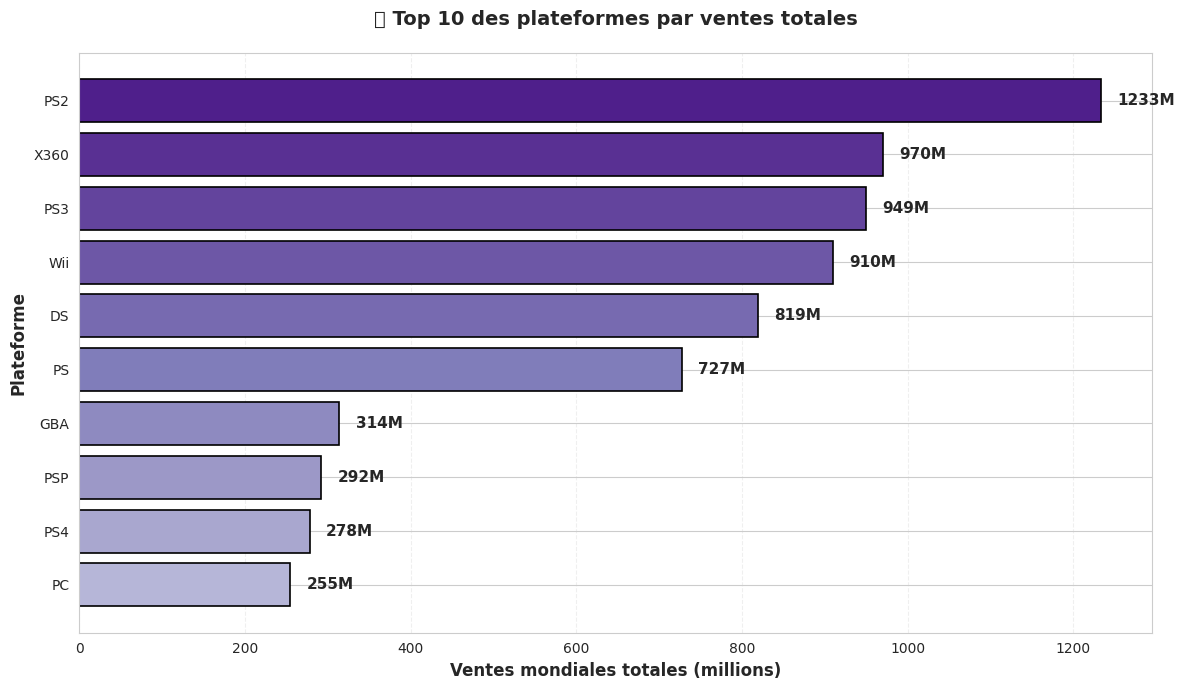


👑 PLATEFORME #1 : PS2 avec 1233 millions de ventes !


<Figure size 1200x600 with 0 Axes>

In [ ]:
# Grouper les ventes par plateforme et prendre le top 10
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=True).tail(10)

plt.figure(figsize=(12, 7))
colors = plt.cm.Purples(np.linspace(0.4, 0.9, 10))
bars = plt.barh(top_platforms.index, top_platforms.values, color=colors, edgecolor='black', linewidth=1.2)

# Ajouter les valeurs
for i, (platform, value) in enumerate(top_platforms.items()):
    plt.text(value + 20, i, f'{value:.0f}M', va='center', fontweight='bold', fontsize=11)

plt.xlabel('Ventes mondiales totales (millions)', fontsize=12, fontweight='bold')
plt.ylabel('Plateforme', fontsize=12, fontweight='bold')
plt.title('🎮 Top 10 des plateformes par ventes totales',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
plt.savefig('graphique_top_plateformes.png', dpi=300, bbox_inches='tight')


# Afficher la plateforme dominante
print(f"\n👑 PLATEFORME #1 : {top_platforms.index[-1]} avec {top_platforms.values[-1]:.0f} millions de ventes !")


/tmp/ipython-input-4240366797.py:26: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


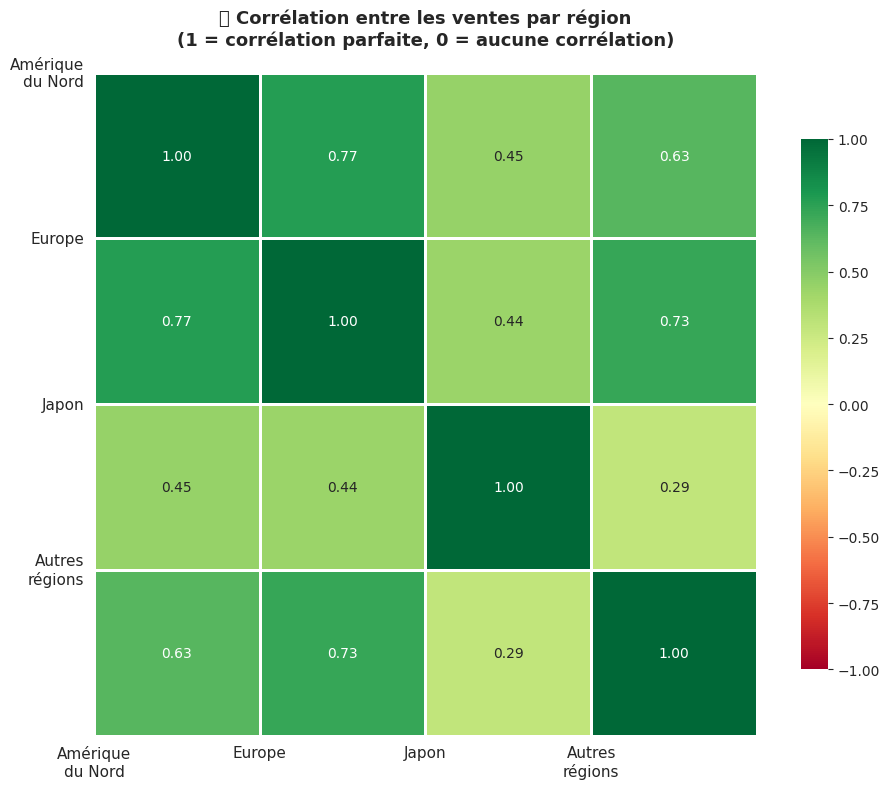


📊 INTERPRÉTATION :
✅ Valeur proche de 1 → Les 2 régions achètent les MÊMES jeux
❌ Valeur proche de 0 → Les régions ont des goûts DIFFÉRENTS


<Figure size 1200x600 with 0 Axes>

In [ ]:
# Sélectionner uniquement les colonnes de ventes régionales
ventes_regions = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Calculer les corrélations entre ces colonnes
correlations = ventes_regions.corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations,
            annot=True,           # Affiche les valeurs dans les cases
            fmt='.2f',            # Format avec 2 décimales
            cmap='RdYlGn',        # Palette de couleurs (Rouge-Jaune-Vert)
            center=0,             # Centre la palette sur 0
            square=True,          # Cases carrées
            linewidths=2,         # Lignes entre les cases
            cbar_kws={"shrink": 0.8},  # Barre de couleur
            vmin=-1, vmax=1)      # Échelle de -1 à 1

# Renommer les axes pour plus de clarté
labels = ['Amérique\ndu Nord', 'Europe', 'Japon', 'Autres\nrégions']
plt.xticks(range(4), labels, rotation=0, fontsize=11)
plt.yticks(range(4), labels, rotation=0, fontsize=11)

plt.title('🔥 Corrélation entre les ventes par région\n(1 = corrélation parfaite, 0 = aucune corrélation)',
          fontsize=13, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
plt.savefig('graphique_heatmap_correlations.png', dpi=300, bbox_inches='tight')

# Explication
print("\n📊 INTERPRÉTATION :")
print("="*70)
print("✅ Valeur proche de 1 → Les 2 régions achètent les MÊMES jeux")
print("❌ Valeur proche de 0 → Les régions ont des goûts DIFFÉRENTS")


/tmp/ipython-input-3857098895.py:22: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3857098895.py:22: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3857098895.py:22: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3857098895.py:22: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3857098895.py:22: UserWarning: Glyph 127471 (\N{REGIONAL INDICATOR SYMBOL LETTER J}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3857098895.py:22: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3857098895.py:22: UserWarning: Glyph

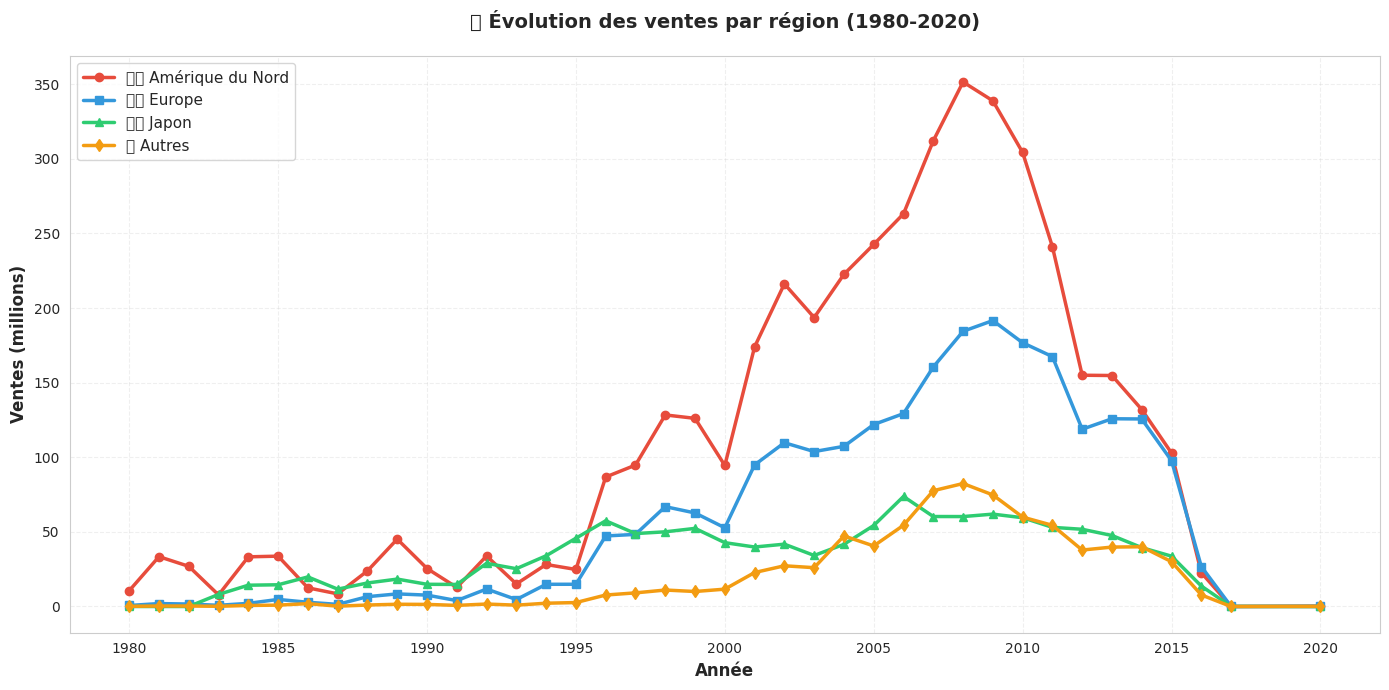


💡 OBSERVATION :
Les USA dominent jusqu'en 2008, puis déclinent avec la montée du mobile gaming


<Figure size 1200x600 with 0 Axes>

In [ ]:
# Grouper par année et calculer les ventes par région
ventes_region_annee = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(14, 7))

# Tracer une ligne pour chaque région
plt.plot(ventes_region_annee.index, ventes_region_annee['NA_Sales'],
         marker='o', linewidth=2.5, label='🇺🇸 Amérique du Nord', color='#e74c3c')
plt.plot(ventes_region_annee.index, ventes_region_annee['EU_Sales'],
         marker='s', linewidth=2.5, label='🇪🇺 Europe', color='#3498db')
plt.plot(ventes_region_annee.index, ventes_region_annee['JP_Sales'],
         marker='^', linewidth=2.5, label='🇯🇵 Japon', color='#2ecc71')
plt.plot(ventes_region_annee.index, ventes_region_annee['Other_Sales'],
         marker='d', linewidth=2.5, label='🌏 Autres', color='#f39c12')

plt.xlabel('Année', fontsize=12, fontweight='bold')
plt.ylabel('Ventes (millions)', fontsize=12, fontweight='bold')
plt.title('🌍 Évolution des ventes par région (1980-2020)',
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()
plt.savefig('graphique_evolution_regions.png', dpi=300, bbox_inches='tight')


print("\n💡 OBSERVATION :")
print("Les USA dominent jusqu'en 2008, puis déclinent avec la montée du mobile gaming")